# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time you run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

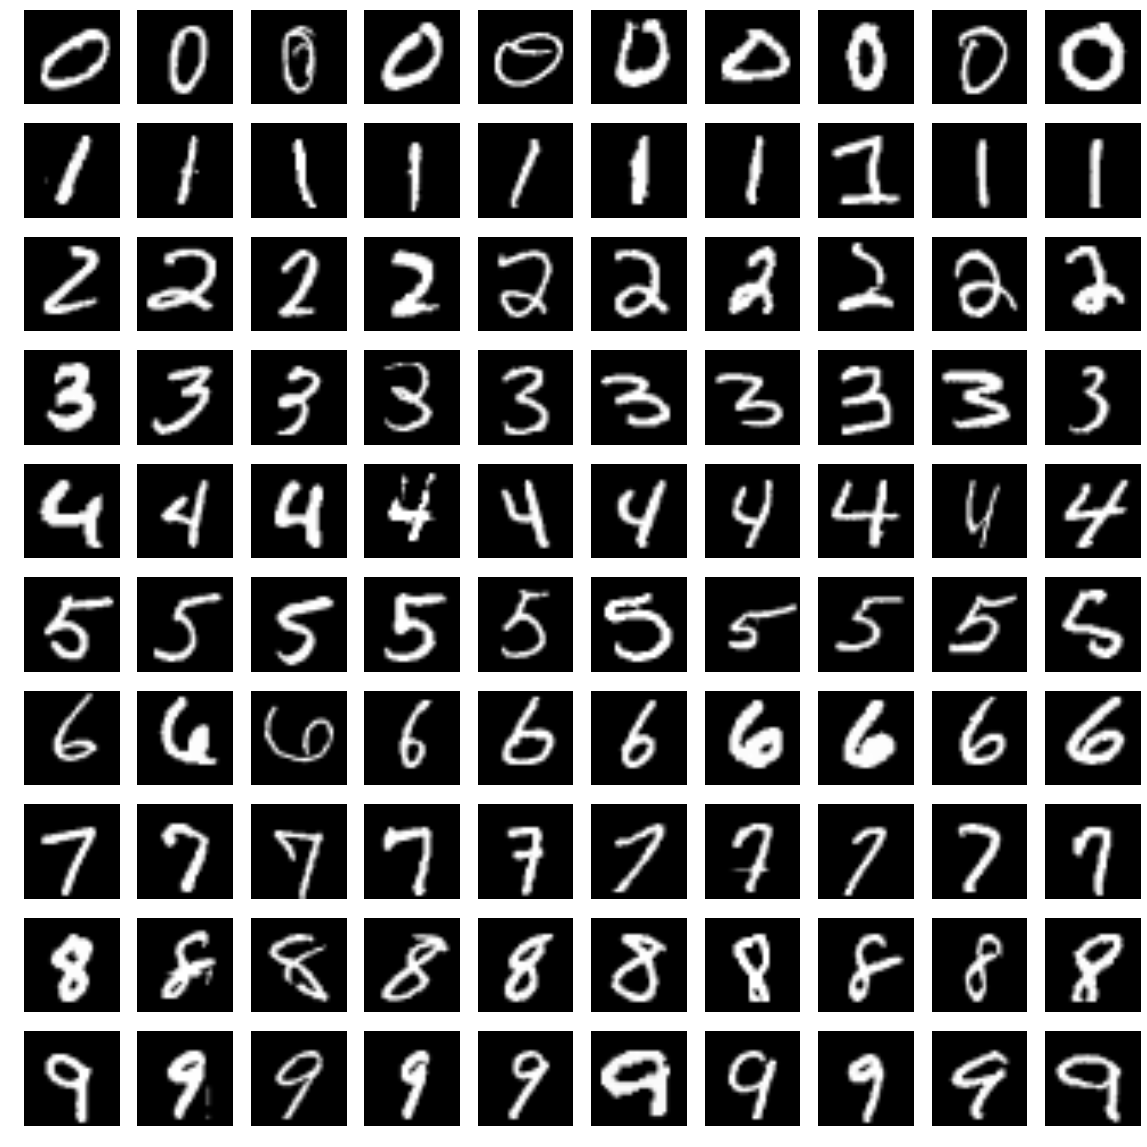

In [3]:
#print(type(j))
#print(np.size(j))
#print(j[0][0:10])
#print(j[0:10])
#print(j[10:19])
#print(j[0][6957])
plt.rc('image',cmap='gray')
    # Set size of plot
plt.figure(figsize=(20,20))
plt.axis('off')
column = 1
dimx, dimy = X.shape
#print(dimy)
#print(dimy)
dim = int(np.sqrt(X.shape[1]))
#print(dim)
#fig.suptitle('Showing examples for each digit', size=18)
for digit in range(0,10):
    j = np.where (Y == digit)
    #print(j[0][0:10])
    for k in (j[0][900:910]):
        #print(k)
        Ax=plt.subplot(10,10, column)
        # Reshape the X data into a 28 x 28 matrix
        #print(digit)
        #print(X[k,:].shape)
        #print(dimx)
        PlotMatrix=np.reshape(X[k,:],newshape=(int(np.sqrt(dimy)), int(np.sqrt(dimy))))
        #PlotMatrix = X[k,:]
        #print(PlotMatrix)
        plt.imshow(PlotMatrix)
        plt.axis('off')
        column += 1
        #fig.subplots_adjust(wspace=.02, hspace=.02)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_neighbors):

### STUDENT START ###

# REFERENCE: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# REFERENCE: https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-
# and-the-machine-learning-pipeline-iii-scaling-your-data-to-combat-noise#gs.GUmxoCY

    for k in k_neighbors:
        # Find the k neighbors of a point
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model using the mini training set the as training data and the mini
        # training labels as the target values
        knn_model = knn.fit(mini_train_data, mini_train_labels)
        
        # The model has been fit
        # Now predict labels using the dev set
        predicted_dev_labels = knn_model.predict(dev_data)
        
        # Report accuracy for the dev set
        print('Accuracy using k = {0:d} neighbors: {1:.3f}'.format(k, knn_model.score(dev_data, dev_labels)))
        #print('knn score for dev test set with k = %d neighbors: %f' % k, knn_model.score(dev_data, dev_labels)) 
        
        print('knn score for training set, with {0:2d} neighbors : \
                        {1:6.4f}'.format(k, knn_model.score(dev_data, dev_labels)))
            
        true_dev_labels, pred_dev_labels = dev_labels, knn_model.predict(dev_data)
        if k == 1:
            print ('\033[1m') # print in bold font
            print(classification_report(true_dev_labels, pred_dev_labels))
            print ('\033[0m') # stop printing bold

    
### STUDENT END ###

k_neighbors = [1, 3, 5, 7, 9]
P2(k_neighbors)

Accuracy using k = 1 neighbors: 0.888
knn score for training set, with  1 neighbors :                         0.8880

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Accuracy using k = 3 neighbors: 0.878
knn score for training set, with  3 neighbors :                         0.8780
Accuracy using k = 5 neighbors: 0.869
knn score for training set, with  5 neighbors :                         0.8690
Accuracy

ANSWER:

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [ ]:
### STUDENT START ###
def P3(train_sizes, accuracies):
    ### STUDENT START ###
    # Initialize an array of accuracy values 
    for train_size in train_sizes:
        
        # Create the Single-Nearest-neighbor object
        knn = KNeighborsClassifier(n_neighbors=1)
        
        # Partition and establish the test data
        X, y = train_data[0:train_size], train_labels[0:train_size]
        
        # Fit the training data (X) to the training labels (Y) for "tsize" number of training samples
        knn.fit(X, y)
        
        # Start wall clock...
        tStart = time.time()
        
        # Use the predictor on the dev data
        predicted_dev_labels = knn.predict(dev_data)
        
        # Stop the wall clock after prediction is complete...
        tEnd = time.time()
        
        # Calculate accuracy of our Predict_k model
        accuracy = knn.score(dev_data, dev_labels)
        
        # Append this accuracy value to our accuracies list
        accuracies.append(accuracy)
        
        # Report time required to predict given training size
        print("Training Size \t Accuracy \t Computation Time")
        print("{0:2d} \t\t  {1:0.4f} \t {2:0.6f}" \
                            .format (train_size, accuracy, tEnd - tStart))
    # Return array of accuracy values
    return
    ### STUDENT END ###

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [ ]:
#def P4():

### STUDENT START ###
def P4(nVals, accuracies):
    ### STUDENT START ###
    # Create a linear regression model:
    LReg = LinearRegression()
    # Convert "train_sizes" array defined in problem3 to a feature vector
    XTS = (np.array(train_sizes))[:,np.newaxis]
    # Fit accuracies to train_sizes (from the last step)
    LReg.fit(X=XTS,y=accuracies)
    # Predict value of accuracies for n=60,000
    print "For number of training points %i, linear regression predicts a required time of %f" %(nVals, LReg.predict(nVals))
    # Print intercept and coefficient for the linear regression model
    print "Intercept:  %f and Coefficient:  %f" %(LReg.intercept_, LReg.coef_)
    # Clearly this is not a good fit since in reality accuracy plateaus as it gets close to 1.0
    # Therefore, try to fit accuracy against log(training_size)
    ##  New LR model object and fit now to the log( train_sizes )
    LReg2 = LinearRegression()
    ##  Apply log() transformation to X
    LogTS=np.log(train_sizes)
    ##  Convert this new log-transformed X to a feature vector to apply LR
    XLogTS=(np.array(LogTS))[:,np.newaxis]
    ##  LR fit of y vs log(train_sizes)
    LReg2.fit(X=XLogTS, y=accuracies)
    # Print intercept and coefficient for Lin Regression after applying log(X)
    print "For Log(X) vs Y, the Intercept: %f   and Coefficient: %f" %(LReg2.intercept_, LReg2.coef_)
    print "With log(X) applied, the predicted accuracy for nVals = %i is %f" %(nVals, LReg2.predict(np.log(nVals)))
    ### STUDENT END ###


### STUDENT END ###

#P4()

ANSWER:

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [ ]:
#def P5():

### STUDENT START ###
def P5():
    ### STUDENT START ###
    # Create the Nearest-neighbor object
    KNObj=KNeighborsClassifier(n_neighbors=1)
    # Use training data to fit a KNearestNeighbor model
    KNObj.fit(train_data,train_labels)
    # Create array of predicted outputs from dev_data (nparray)
    DevHat = KNObj.predict(dev_data)
    # Output the confusion matrix for dev data
    Conf_Matrix = confusion_matrix(y_pred=DevHat,y_true=dev_labels)
    print Conf_Matrix
    # return the KNobjFit since we'll use that to print out examples of confused digits...
    return DevHat
    ### STUDENT END ###

DevHat=P5()
# As can be seen in the output, the digit '3' is oft confused for 2 or 8 and '8' was once erroneously id'd as a '3'...
# ID a case of 3 confused for an '8':
# ID a case of 8 confused for a 3':
# Identify the index of a '3' confused for an '8'
##     "np.intersect1d" function produces common elements in two input arrays of indices...
##     "np.where" function produces the indices where the array element matches the argument.
print np.intersect1d(np.where((dev_labels==3))[0], (np.where(DevHat==8))[0], assume_unique=True)
# Now identify the index of '8's confused as a '3'
print np.intersect1d(np.where((dev_labels==8))[0], (np.where(DevHat==3))[0], assume_unique=True)
#
# Now print out each of these as examples of a confusing pair of integers...
###   Setup plot area...
plt.figure(figsize=(15,3))
###   First the actual == '3' & predicted == '8'  (This is index == 244)
Ax=plt.subplot(1,2,1)
####      Reshape the X data into a 28 x 28 matrix
PlotMatrix=np.reshape(dev_data[244,:],newshape=(28,28))
plt.imshow(PlotMatrix)
plt.axis('off')
plt.title("A \'3\' that was predicted to be an \'8\'")
###   Now Plot the '8' that looks like a '3'
Ax=plt.subplot(1,2,2)
####      Reshape the X data into a 28 x 28 matrix
PlotMatrix=np.reshape(dev_data[170,:],newshape=(28,28))
plt.imshow(PlotMatrix)
plt.axis('off')
plt.title("An \'8\' that was predicted to be a \'3\'")
    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [ ]:
#def P6():
    
### STUDENT START ###
# Helper function:  Blur a data dataset with relative weight main_wt applied to original point.
def Blur(dataSet,main_wt):
    # Initialize Blurred ndarray
    blurDataSet = np.ndarray(shape=(dataSet.shape[0],784))
    for dSRow in range(dataSet.shape[0]):
        ## Important!  I discovered naively that I need to copy.  Otherwise this modifies original dataSet elements!!
        blurredSample = np.copy(dataSet[dSRow])
        origSample = blurredSample
        for i in range(1,27):
            for j in range(1,27):
                # Sum of 8 surrounding pixels
                sumSurr = np.sum(origSample[np.array([((i-1)*28)+j-1, ((i-1)*28)+j, ((i-1)*28)+j+1, ((i)*28)+j-1, ((i)*28)+j+1, ((i+1)*28)+j-1, ((i+1)*28)+j, ((i+1)*28)+j+1])])
                blurredSample[(i*28)+j] = (main_wt*origSample[(i*28)+j]) + (((1-main_wt)/8)*sumSurr)
                # Set blurDataSet feature to that newly-blurred value
        blurDataSet[dSRow] = blurredSample
    return blurDataSet

def P6(main_wt):
    ### STUDENT START ###
    print "for surrounding sample-pixel weight of %f%%" %(100*(1-main_wt))
    ## Blur the pre-process training data using given main_wt...
    blurMiniTrainData = Blur(mini_train_data,main_wt)
    ## Blur the dev data using given main_wt...
    blurDevData = Blur(dev_data,main_wt)
    ## Fit blurred mini_training data / predict using un-blurred dev-data
    objKNN1_bMTD_uDD = KNeighborsClassifier(n_neighbors=1)
    objKNN1_bMTD_uDD.fit(blurMiniTrainData,mini_train_labels)
    bMTD_uDD_score = objKNN1_bMTD_uDD.score(dev_data,dev_labels)
    print "   Score for blur mini-train data predicting unblur dev data is %s" %(bMTD_uDD_score)
    
    ## Fit non-blurred mini-training data / predict using blurred dev-data
    objKNN1_uMTD_bDD = KNeighborsClassifier(n_neighbors=1)
    objKNN1_uMTD_bDD.fit(mini_train_data,mini_train_labels)
    uMTD_bDD_score = objKNN1_uMTD_bDD.score(blurDevData,dev_labels)
    print "   Score for Unblur mini-train data predicting blur dev data is %s" %(uMTD_bDD_score)
        
    ## Fit blurred mini-training data / predict using blurred dev-data
    objKNN1_bMTD_bDD = KNeighborsClassifier(n_neighbors=1)
    objKNN1_bMTD_bDD.fit(blurMiniTrainData,mini_train_labels)
    bMTD_bDD_score = objKNN1_bMTD_bDD.score(blurDevData,dev_labels)
    print "   Score for blur mini-train data predicting blur dev data is %s" %(bMTD_bDD_score)
    print ""
        
    ### STUDENT END ###

for weight in np.linspace(0,1,num=11):
    P6(main_wt=weight)

### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [ ]:
#def P7():

### STUDENT START ###
def tertiarize_pixels(data, thresholds=[0.3, 0.6]):
    # Initialize a new feature array with the same shape as the original data.
    tertiarized_data = np.zeros(data.shape)

    # Apply a threshold  to each feature.
    for feature in range(data.shape[1]):
        tertiarized_data[:,feature] = data[:,feature] > thresholds[0]
        tertiarized_data[:,feature] = tertiarized_data[:,feature] + (data[:,feature] > thresholds[1])
    return tertiarized_data




def P7():
    ### STUDENT START ###
    ####  Pre-set alpha to 1
    alpha=1
    ####    Create a BernoulliNB object using Laplace smoothing alpha of 1 and binarizing the data at threshold of 0.5
    BernNB = BernoulliNB(alpha = alpha, binarize=0.5)
    BernNB.fit(train_data, train_labels)
    print 'Bernoulli Naive Bayes accuracy: %3.2f' %BernNB.score(dev_data, dev_labels)
    ####    Create a MultinomialNB object
    #####          Pre-process train_data to convert features (pixel values) to 0, 1, or 2...
    Tert_traindata = tertiarize_pixels(train_data)
    #####   Create a MultinomialNB object
    MultNB = MultinomialNB(alpha=alpha, class_prior=None, fit_prior=True)
    #####   Fit to the tertiary map data: (0,1,2)
    MultNB.fit(Tert_traindata, train_labels)
    #####   Convert the dev_data to 3 feature values [0 1 2]
    Tert_devdata = tertiarize_pixels(dev_data)
    #### Report results with 3-level data feature values
    print 'Multinomial Naive Bayes accuracy: %f' %(MultNB.score(Tert_devdata, dev_labels))
    ### STUDENT END ###

P7()
# Tert_Data = tertiarize_pixels(test_data)
# print Tert_Data[1]

    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [ ]:
#def P8(alphas):

### STUDENT START ###
def P8(alphas):
    ### STUDENT START ###
    ####   Create parameters to create GridSearchCV object
    ####       fit_params 
    # DelMe:  fitParams = {X:train_data, Y:train_labels}
    ####  Create a BernoulliNB object...
    BNB = BernoulliNB(binarize=0.5)
    ####  Create a GridSearchCV object...
    GSCV = GridSearchCV(estimator = BNB, param_grid = alphas)
    ####  Run BernoulliNB over the grid array of alpha values...
    GSCV.fit(X=train_data, y=train_labels)
    return GSCV
    
    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [ ]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [ ]:
#def P9():

### STUDENT END ###
def P9():
    ### STUDENT END ###
    #### Create a GaussianNB object
    objGaussNB = GaussianNB()
    #### Fit Data to the model...
    objGaussNB.fit(X=train_data, y=train_labels)
    #### Evaluate fit
    objGNBScore = objGaussNB.score(dev_data, dev_labels)
    print objGNBScore
    #### Return fit object
    return objGaussNB
    ### STUDENT END ###

gnb = P9()

### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [ ]:
#def P10(num_examples):

### STUDENT START ###
def P10(num_examples):
    ### STUDENT START ###
    ## Once again, generate a BernoulliNB model
    ###  Spin up a BNB object
    objBNB = BernoulliNB(alpha=1, binarize=0.5)
    ###  Fit the training data
    objBNB.fit(mini_train_data,mini_train_labels)
    ###  Convert to probability from the feature_log_prob_ attribute:
    Prob = np.exp(objBNB.feature_log_prob_)
    ### Set plot area...
    plt.figure(figsize=(30,30))
    ### Looop over digits from 0 to 9
    for digit in range(0,10,1):
        ## Generate num_examples samples of each digit
        for i in range(0,num_examples):
            ### Determine whether to light up a pixel or not based on whether rand > Prob...
            newArtDigit = Prob[digit,] > np.random.rand(1,784)
            ###   Setup plot area / go to ...
            Ax=plt.subplot(20,20,i+1+(20*digit))
            PlotMatrix=np.reshape(newArtDigit[0,:],newshape=(28,28))
            plt.imshow(PlotMatrix)
            ###  Turn off axis since we don't need it.
            plt.axis('off')
    plt.show()

    ### STUDENT END ###

ojbThing = P10(20)

### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
def P11(buckets, correct, total):
    ### STUDENT START ###
    ####  Create a BernoulliNB object using the alpha value discovered in problem 
    objBNB = BernoulliNB(alpha=0.001)
    ####  Fit the data to train_data
    objBNB.fit(X=train_data, y = train_labels)
    
    
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()